In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [68]:
backend = Aer.get_backend('qasm_simulator')
shots = 1

In [223]:
def Encoder(qc,qubits):
    qc.h([qubits[0],qubits[1],qubits[3]])
    qc.barrier()
    qc.cx(qubits[0],[qubits[2],qubits[4],qubits[6]])
    qc.barrier()
    qc.cx(qubits[1],[qubits[2],qubits[5],qubits[6]])
    qc.barrier()
    qc.cx(qubits[3],[qubits[4],qubits[5],qubits[6]])
    qc.barrier()
    
def Syndrome(qc,qubits,ancilla,auxiliar):
    qc.cx([qubits[3],qubits[4],qubits[5],qubits[6]],ancilla[0])
    qc.barrier()
    qc.cx([qubits[1],qubits[2],qubits[5],qubits[6]],ancilla[1])
    qc.barrier()
    qc.cx([qubits[0],qubits[2],qubits[4],qubits[6]],ancilla[2])
    qc.barrier()
    qc.h(qubits)
    qc.barrier()
    qc.cx([qubits[3],qubits[4],qubits[5],qubits[6]],ancilla[3])
    qc.barrier()
    qc.cx([qubits[1],qubits[2],qubits[5],qubits[6]],ancilla[4])
    qc.barrier()
    qc.cx([qubits[0],qubits[2],qubits[4],qubits[6]],ancilla[5])
    qc.barrier()
    qc.h(qubits)
    qc.barrier()
    qc.mct([ancilla[1],ancilla[2]],auxiliar[0])
    qc.mct([ancilla[0],ancilla[2]],auxiliar[1])
    qc.mct([ancilla[0],ancilla[1]],auxiliar[2])
    qc.mct([ancilla[0],ancilla[1],ancilla[2]],auxiliar[3])
    qc.barrier()
    qc.cx(auxiliar[3],[ancilla[0],ancilla[1],ancilla[2],auxiliar[0],auxiliar[1],auxiliar[2]])
    qc.cx(auxiliar[2],[ancilla[0],ancilla[1]])
    qc.cx(auxiliar[1],[ancilla[0],ancilla[2]])
    qc.cx(auxiliar[0],[ancilla[1],ancilla[2]])
    qc.barrier()
    qc.mct([ancilla[4],ancilla[5]],auxiliar[4])
    qc.mct([ancilla[3],ancilla[5]],auxiliar[5])
    qc.mct([ancilla[3],ancilla[4]],auxiliar[6])
    qc.mct([ancilla[3],ancilla[4],ancilla[5]],auxiliar[7])
    qc.barrier()
    qc.cx(auxiliar[7],[ancilla[3],ancilla[4],ancilla[5],auxiliar[4],auxiliar[5],auxiliar[6]])
    qc.cx(auxiliar[6],[ancilla[3],ancilla[4]])
    qc.cx(auxiliar[5],[ancilla[3],ancilla[5]])
    qc.cx(auxiliar[4],[ancilla[4],ancilla[5]])
    qc.barrier()

In [224]:
qubits = QuantumRegister(7,name='qubits')
ancilla = QuantumRegister(6,name='ancilla')
auxiliar = QuantumRegister(8,name='aux')
bits = ClassicalRegister(7,name='bits')
cbit1 = ClassicalRegister(1,name='cbit1')
cbit2 = ClassicalRegister(1,name='cbit2')
cbit3 = ClassicalRegister(1,name='cbit3')
cbit4 = ClassicalRegister(1,name='cbit4')
cbit5 = ClassicalRegister(1,name='cbit5')
cbit6 = ClassicalRegister(1,name='cbit6')
cbit7 = ClassicalRegister(1,name='cbit7')
cbit8 = ClassicalRegister(1,name='cbit8')
cbit9 = ClassicalRegister(1,name='cbit9')
cbit10 = ClassicalRegister(1,name='cbit10')
cbit11 = ClassicalRegister(1,name='cbit11')
cbit12 = ClassicalRegister(1,name='cbit12')
cbit13 = ClassicalRegister(1,name='cbit13')
cbit14 = ClassicalRegister(1,name='cbit14')

qc = QuantumCircuit(qubits,ancilla,auxiliar,bits,cbit1,cbit2,cbit3,cbit4,cbit5,cbit6,cbit7,cbit8,cbit9,cbit10,cbit11,cbit12,cbit13,cbit14)

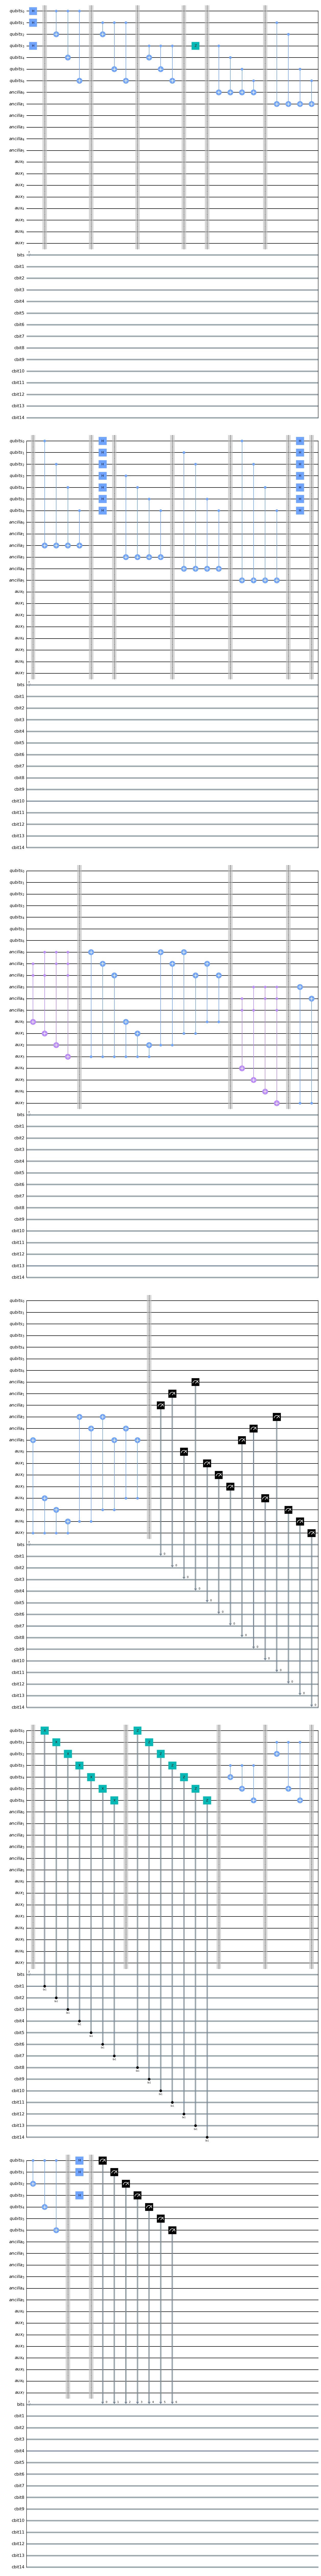

In [225]:
Encoder(qc,qubits)
##### Introducing an error
qc.z(qubits[3])
qc.barrier()
#####
Syndrome(qc,qubits,ancilla,auxiliar)
qc.measure(ancilla[2],cbit1)
qc.measure(ancilla[1],cbit2)
qc.measure(auxiliar[0],cbit3)
qc.measure(ancilla[0],cbit4)
qc.measure(auxiliar[1],cbit5)
qc.measure(auxiliar[2],cbit6)
qc.measure(auxiliar[3],cbit7)
qc.measure(ancilla[5],cbit8)
qc.measure(ancilla[4],cbit9)
qc.measure(auxiliar[4],cbit10)
qc.measure(ancilla[3],cbit11)
qc.measure(auxiliar[5],cbit12)
qc.measure(auxiliar[6],cbit13)
qc.measure(auxiliar[7],cbit14)
qc.barrier()
qc.x(qubits[0]).c_if(cbit1,1)
qc.x(qubits[1]).c_if(cbit2,1)
qc.x(qubits[2]).c_if(cbit3,1)
qc.x(qubits[3]).c_if(cbit4,1)
qc.x(qubits[4]).c_if(cbit5,1)
qc.x(qubits[5]).c_if(cbit6,1)
qc.x(qubits[6]).c_if(cbit7,1)
qc.barrier()
qc.z(qubits[0]).c_if(cbit8,1)
qc.z(qubits[1]).c_if(cbit9,1)
qc.z(qubits[2]).c_if(cbit10,1)
qc.z(qubits[3]).c_if(cbit11,1)
qc.z(qubits[4]).c_if(cbit12,1)
qc.z(qubits[5]).c_if(cbit13,1)
qc.z(qubits[6]).c_if(cbit14,1)
qc.barrier()
qc.cx(qubits[3],[qubits[4],qubits[5],qubits[6]])
qc.barrier()
qc.cx(qubits[1],[qubits[2],qubits[5],qubits[6]])
qc.barrier()
qc.cx(qubits[0],[qubits[2],qubits[4],qubits[6]])
qc.barrier()
qc.h([qubits[0],qubits[1],qubits[3]])
qc.barrier()
qc.measure(qubits,bits)

qc.draw('mpl')

In [226]:
qc = qc.reverse_bits()

In [227]:
job = execute(qc,backend=backend,shots=shots).result().get_counts()
print(job)

{'0000000 0 0 0 0 0 0 0 0 0 0 1 0 0 0': 1}
